In [21]:
!pip install xgboost
!pip install shap
!pip install dataframe_image
!pip install lightgbm

In [22]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
pd.options.display.max_rows

60

In [23]:
#essentials
import os
import numpy as np
import pandas as pd
#import dataframe_image as dfi
from tqdm import tqdm
import pickle
import warnings
warnings.filterwarnings('ignore')

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#tools/metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
import shap

#modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

#pandas show all columns
pd.set_option('display.max_columns', None)


In [24]:
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [25]:
fd = pd.read_csv("D:\\Github\\Capstone-project\\Data folder\\final_dataset.csv")
fd.head(3)

,Unnamed: 0_x,Player Name,season,Team,conf_abbr,games,games_started,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg2_per_g,fg2a_per_g,fg2_pct,fg3_per_g,fg3a_per_g,fg3_pct,ft_per_g,fta_per_g,ft_pct,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,sos,mp,fg,fga,fg2,fg2a,fg2_pct.1,fg3,fg3a,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,fg_per_min,fga_per_min,fg2_per_min,fg2a_per_min,fg3_per_min,fg3a_per_min,ft_per_min,fta_per_min,trb_per_min,ast_per_min,stl_per_min,blk_per_min,tov_per_min,pf_per_min,pts_per_min,fg_per_poss,fga_per_poss,fg2_per_poss,fg2a_per_poss,fg3_per_poss,fg3a_per_poss,ft_per_poss,fta_per_poss,trb_per_poss,ast_per_poss,stl_per_poss,blk_per_poss,tov_per_poss,pf_per_poss,pts_per_poss,off_rtg,def_rtg,per,ts_pct,efg_pct,fg3a_per_fga_pct,fta_per_fga_pct,pprod,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,ows,dws,ws,ws_per_40,obpm,dbpm,bpm,year,Ht,Wt,Yr,G,S,%Min,ORtg,%Poss,%Shots,eFG%,TS%,OR%,DR%,ARate,TORate,Blk%,Stl%,FC/40,FD/40,FTRate,FTM-A,Pct,2PM-A,Pct.1,3PM-A,Pct.2,%Pct,%2PM-A,%Pct.1
0,3.0,chris-clemons-2,2018-19,CAMPBELL,Big South,33,33,36.6,9.2,20.6,0.448,5.0,8.8,0.569,4.2,11.8,0.357,7.5,8.6,0.869,0.8,4.3,5.1,2.8,1.5,0.3,2.5,1.9,30.1,-4.39,1208,304.0,679.0,165.0,290.0,0.569,139.0,389.0,246.0,283.0,25.0,142.0,167,94.0,49.0,11.0,84.0,63.0,993.0,10.1,22.5,5.5,9.6,4.6,12.9,8.1,9.4,5.5,3.1,1.6,0.4,2.8,2.1,32.9,14.8,33.1,8.0,14.1,6.8,18.9,12.0,13.8,8.1,4.6,2.4,0.5,4.1,3.1,48.3,120.1,104.4,33.0,0.610,0.550,0.573,0.417,888.0,2.4,14.5,8.3,19.3,2.4,1.1,9.4,39.0,6.1,1.4,7.5,0.250,9.3,-1.6,7.7,2019,69,180.0,Sr,30,30.0,93.9,115.6,37.5,39.4,53.6,59.9,2.5,14.0,19.4,10.8,1.0,2.5,2.2,7.6,42.5,233-270,.863 56,149-266,.560 383,128-370,0.346,0.863,149-266,0.560
1,8.0,antoine-davis-2,2018-19,DETROIT MERCY,Horizon,30,29,37.4,8.8,21.9,0.4,4.4,10.3,0.423,4.4,11.6,0.38,4.2,4.9,0.857,0.7,2.4,3.1,3.6,0.9,0.0,3.3,2.3,26.1,-0.36,1122,263.0,657.0,131.0,310.0,0.423,132.0,347.0,126.0,147.0,22.0,72.0,94,107.0,28.0,0.0,99.0,70.0,784.0,9.4,23.4,4.7,11.1,4.7,12.4,4.5,5.2,3.4,3.8,1.0,0.0,3.5,2.5,28.0,13.3,33.3,6.6,15.7,6.7,17.6,6.4,7.4,4.8,5.4,1.4,0.0,5.0,3.5,39.7,109.0,118.9,22.4,0.539,0.501,0.528,0.224,738.0,2.1,7.5,4.7,24.0,1.4,0.0,12.0,36.4,3.4,-0.2,3.1,0.112,5.8,-3.6,2.2,2019,73,170.0,Fr,30,30.0,90.4,107.7,34.8,38.8,50.1,53.9,2.1,7.5,24.0,14.5,0.0,1.4,2.5,5.0,22.4,126-147,.857 69,131-310,0.423,132-347,0.380,0.857,131-310,0.423
2,9.0,antoine-davis-2,2019-20,DETROIT MERCY,Horizon,30,30,36.7,7.9,20.8,0.38,4.5,10.4,0.437,3.4,10.4,0.324,5.1,5.7,0.901,0.3,2.8,3.1,4.5,1.7,0.1,4.5,2.5,24.3,-1.90,1102,237.0,623.0,136.0,311.0,0.437,101.0,312.0,154.0,171.0,9.0,85.0,94,134.0,52.0,3.0,136.0,75.0,729.0,8.6,22.6,4.9,11.3,3.7,11.3,5.6,6.2,3.4,4.9,1.9,0.1,4.9,2.7,26.5,12.2,32.0,7.0,16.0,5.2,16.0,7.9,8.8,4.8,6.9,2.7,0.2,7.0,3.9,37.5,101.8,112.5,21.0,0.518,0.461,0.501,0.274,702.0,0.9,8.8,4.7,33.2,2.7,0.3,16.2,37.2,2.5,0.2,2.7,0.097,3.4,-2.4,1.1,2020,73,160.0,So,30,30.0,88.6,100.0,36.1,38.0,46.1,51.8,0.9,8.8,33.1,19.4,0.3,2.7,2.7,5.6,27.4,154-171,.901 16,136-311,0.437,101-312,0.324,0.901,136-311,0.437


In [26]:
print(len(list(fd.columns)))
print(len(list(fd.columns[(fd. dtypes == 'float64') | (fd. dtypes == 'int64') ])))
print(len(list(fd.columns[(fd. dtypes != 'float64') & (fd. dtypes != 'int64') ])))

132
116
16


In [27]:
columns_to_use = list(fd.columns[(fd. dtypes == 'float64') | (fd. dtypes == 'int64') ])
print(columns_to_use)

['Unnamed: 0_x', 'games', 'games_started', 'mp_per_g', 'fg_per_g', 'fga_per_g', 'fg2_per_g', 'fg2a_per_g', 'fg3_per_g', 'fg3a_per_g', 'ft_per_g', 'fta_per_g', 'orb_per_g', 'drb_per_g', 'trb_per_g', 'ast_per_g', 'stl_per_g', 'blk_per_g', 'tov_per_g', 'pf_per_g', 'pts_per_g', 'sos', 'mp', 'fg', 'fga', 'fg2', 'fg2a', 'fg3', 'fg3a', 'ft', 'fta', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'fg_per_min', 'fga_per_min', 'fg2_per_min', 'fg2a_per_min', 'fg3_per_min', 'fg3a_per_min', 'ft_per_min', 'fta_per_min', 'trb_per_min', 'ast_per_min', 'stl_per_min', 'blk_per_min', 'tov_per_min', 'pf_per_min', 'pts_per_min', 'fg_per_poss', 'fga_per_poss', 'fg2_per_poss', 'fg2a_per_poss', 'fg3_per_poss', 'fg3a_per_poss', 'ft_per_poss', 'fta_per_poss', 'trb_per_poss', 'ast_per_poss', 'stl_per_poss', 'blk_per_poss', 'tov_per_poss', 'pf_per_poss', 'pts_per_poss', 'off_rtg', 'def_rtg', 'per', 'ts_pct', 'efg_pct', 'fg3a_per_fga_pct', 'fta_per_fga_pct', 'pprod', 'orb_pct', 'drb_pct', 'trb_pct', 

In [28]:
columns_not_used = list(fd.columns[(fd. dtypes != 'float64') & (fd. dtypes != 'int64') ])
print(columns_not_used)

['Player Name', 'season', 'Team', 'conf_abbr', 'fg_pct', 'fg2_pct', 'fg3_pct', 'ft_pct', 'fg2_pct.1', 'Yr', 'FTM-A', 'Pct', '2PM-A', 'Pct.1', '3PM-A', '%2PM-A']


In [29]:
fd.describe()

,Unnamed: 0_x,games,games_started,mp_per_g,fg_per_g,fga_per_g,fg2_per_g,fg2a_per_g,fg3_per_g,fg3a_per_g,ft_per_g,fta_per_g,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,sos,mp,fg,fga,fg2,fg2a,fg3,fg3a,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,fg_per_min,fga_per_min,fg2_per_min,fg2a_per_min,fg3_per_min,fg3a_per_min,ft_per_min,fta_per_min,trb_per_min,ast_per_min,stl_per_min,blk_per_min,tov_per_min,pf_per_min,pts_per_min,fg_per_poss,fga_per_poss,fg2_per_poss,fg2a_per_poss,fg3_per_poss,fg3a_per_poss,ft_per_poss,fta_per_poss,trb_per_poss,ast_per_poss,stl_per_poss,blk_per_poss,tov_per_poss,pf_per_poss,pts_per_poss,off_rtg,def_rtg,per,ts_pct,efg_pct,fg3a_per_fga_pct,fta_per_fga_pct,pprod,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,ows,dws,ws,ws_per_40,obpm,dbpm,bpm,year,Ht,Wt,G,S,%Min,ORtg,%Poss,%Shots,eFG%,TS%,OR%,DR%,ARate,TORate,Blk%,Stl%,FC/40,FD/40,FTRate,Pct.2,%Pct,%Pct.1
count,19302.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20620.000000,20620.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20590.000000,20590.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20612.000000,20612.000000,20592.000000,20622.000000,20622.000000,20394.000000,20622.00000,15701.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000,20622.000000
mean,15958.614859,27.200611,14.160848,19.405383,2.431219,5.536553,1.726554,3.446407,0.705935,2.091349,1.241398,1.755635,0.824217,2.275900,3.097789,1.257094,0.622263,0.316705,1.199893,1.687664,6.804544,-0.302665,425.142615,54.490748,123.237218,38.540670,76.608559,15.950078,46.628659,28.246421,39.608195,17.851270,66.743366,68.131025,28.058748,13.531384,6.835351,26.111662,36.015761,153.191998,4.629381,10.674726,3.331694,6.679304,1.297760,3.995752,2.315770,3.402817,6.493221,2.327553,1.228901,0.709252,2.446329,3.868393,12.871370,6.702478,15.456634,4.823199,9.670614,1.879590,5.786354,3.348894,4.920774,9.405184,3.369751,1.776695,1.026845,3.538575,5.599379,18.633750,101.158014,102.621481,13.232111,0.538440,0.491375,0.365920,0.347286,199.563577,5.300165,13.424154,9.363053,11.340481,1.780356,1.995085,16.980763,18.660949,0.802260,0.722718,1.527029,0.115723,-1.236581,0.110445,-1.331808,2021.026719,77.319610,203.428852,24.04340,16.508503,42.642387,97.703744,18.566924,18.512938,48.432810,51.215396,5.188653,13.278251,11.130118,19.421215,1.947110,1.731801,3.938832,3.227602,34.387959,0.262025,0.655413,0.477169
std,9392.175519,15.368119,14.784247,9.312031,1.670722,3.643642,1.368407,2.579986,0.724754,1.936837,1.069392,1.400053,0.693961,1.439546,1.979802,1.157330,0.455108,0.399513,0.765869,0.739054,4.717787,5.720635,485.357201,70.570790,157.898980,53.456835,103.559312,26.471129,73.088532,41.693540,56.409678,25.953075,59.931223,85.515765,43.766842,18.196015,13.074013,33.194348,40.371344,200.312279,1.757123,3.411830,1.845582,3.173317,1.

In [30]:
#.astype(int)
list(fd['year'].unique())

#fd['year'] = fd['year'].astype(int)



[2019, 2020, 2021, 2022, 2023]

In [31]:
list1 = [2019, 2020, 2021, 2022, 2023]
fd[~fd['year'].isin(list1)]


,Unnamed: 0_x,Player Name,season,Team,conf_abbr,games,games_started,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg2_per_g,fg2a_per_g,fg2_pct,fg3_per_g,fg3a_per_g,fg3_pct,ft_per_g,fta_per_g,ft_pct,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,sos,mp,fg,fga,fg2,fg2a,fg2_pct.1,fg3,fg3a,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,fg_per_min,fga_per_min,fg2_per_min,fg2a_per_min,fg3_per_min,fg3a_per_min,ft_per_min,fta_per_min,trb_per_min,ast_per_min,stl_per_min,blk_per_min,tov_per_min,pf_per_min,pts_per_min,fg_per_poss,fga_per_poss,fg2_per_poss,fg2a_per_poss,fg3_per_poss,fg3a_per_poss,ft_per_poss,fta_per_poss,trb_per_poss,ast_per_poss,stl_per_poss,blk_per_poss,tov_per_poss,pf_per_poss,pts_per_poss,off_rtg,def_rtg,per,ts_pct,efg_pct,fg3a_per_fga_pct,fta_per_fga_pct,pprod,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,ows,dws,ws,ws_per_40,obpm,dbpm,bpm,year,Ht,Wt,Yr,G,S,%Min,ORtg,%Poss,%Shots,eFG%,TS%,OR%,DR%,ARate,TORate,Blk%,Stl%,FC/40,FD/40,FTRate,FTM-A,Pct,2PM-A,Pct.1,3PM-A,Pct.2,%Pct,%2PM-A,%Pct.1


In [11]:
fd.sort_values('mp_per_g').head(3)

,Unnamed: 0_x,Player Name,season,Team,conf_abbr,games,games_started,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg2_per_g,fg2a_per_g,fg2_pct,fg3_per_g,fg3a_per_g,fg3_pct,ft_per_g,fta_per_g,ft_pct,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,sos,mp,fg,fga,fg2,fg2a,fg2_pct.1,fg3,fg3a,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,fg_per_min,fga_per_min,fg2_per_min,fg2a_per_min,fg3_per_min,fg3a_per_min,ft_per_min,fta_per_min,trb_per_min,ast_per_min,stl_per_min,blk_per_min,tov_per_min,pf_per_min,pts_per_min,fg_per_poss,fga_per_poss,fg2_per_poss,fg2a_per_poss,fg3_per_poss,fg3a_per_poss,ft_per_poss,fta_per_poss,trb_per_poss,ast_per_poss,stl_per_poss,blk_per_poss,tov_per_poss,pf_per_poss,pts_per_poss,off_rtg,def_rtg,per,ts_pct,efg_pct,fg3a_per_fga_pct,fta_per_fga_pct,pprod,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,ows,dws,ws,ws_per_40,obpm,dbpm,bpm,year,Ht,Wt,Yr,G,S,%Min,ORtg,%Poss,%Shots,eFG%,TS%,OR%,DR%,ARate,TORate,Blk%,Stl%,FC/40,FD/40,FTRate,FTM-A,Pct,2PM-A,Pct.1,3PM-A,Pct.2,%Pct,%2PM-A,%Pct.1
17209,1122.0,divante-moffitt-1,2022-23,IDAHO,Big Sky,32,32,0.0,0.0,0.0,0.473,0.0,0.0,0.516,0.0,0.0,0.263,0.0,0.0,0.835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1095,0.0,0.0,0.0,0.0,0.516,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,75,184.0,Sr,30,30.0,87.5,105.2,32.2,31.2,49.5,55.7,2.1,8.0,31.4,16.6,0.0,1.1,2.6,5.8,39.3,143-170,.841 158,186-359,0.518,19-74,0.257,0.841,186-359,0.518
10540,19571.0,josh-mack-1,2022-23,STONEHILL,NEC,29,2,0.0,0.0,0.0,0.504,0.0,0.0,0.571,0.0,0.0,0.407,0.0,0.0,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,662,0.0,0.0,0.0,0.0,0.571,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023.0,72,175.0,Sr,28,2.0,54.0,107.8,15.5,15.2,58.5,60.5,2.0,10.9,17.6,19.9,0.9,1.7,4.0,2.5,31.0,28-40,0.7,44-76,.579 286,21-53,0.396,0.700,44-76,0.579
10533,19556.0,trenton-gibson-1,2022-23,INDIANA STATE,MVC,32,12,0.0,0.0,0.0,0.5,0.0,0.0,0.6,0.0,0.0,0.348,0.0,0.0,0.758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,523,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023.0,76,200.0,Sr,31,11.0,35.7,115.0,18.5,15.4,55.5,60.6,4.9,17.7,18.6,18.2,1.5,1.9,3.4,3.9,56.4,47-62,0.758,40-68,0.588,14-42,0.333,0.758,40-68,0.588


In [13]:
fd['prev_year'] = fd['year']-1
fd[['Player Name', 'season', 'Team','year', 'prev_year','ows', 'dws']]


,Player Name,season,Team,year,prev_year,ows,dws
0,chris-clemons-2,2018-19,CAMPBELL,2019.0,2018.0,6.1,1.4
1,antoine-davis-2,2018-19,DETROIT MERCY,2019.0,2018.0,3.4,-0.2
2,antoine-davis-2,2019-20,DETROIT MERCY,2020.0,2019.0,2.5,0.2
3,antoine-davis-2,2020-21,DETROIT MERCY,2021.0,2020.0,3.0,0.3
4,carsen-edwards-1,2018-19,PURDUE,2019.0,2018.0,4.0,1.6
...,...,...,...,...,...,...,...
20617,shanquan-hemphill-1,2020-21,DRAKE,2021.0,2020.0,1.9,1.2
20618,shanquan-hemphill-1,2021-22,DRAKE,2022.0,2021.0,1.8,1.3
20619,charles-obannonjr-1,2020-21,TCU,2021.0,2020.0,0.8,0.6
20620,charles-obannonjr-1,2021-22,TCU,2022.0,2021.0,1.8,1.5


In [16]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20622 entries, 0 to 20621
Columns: 133 entries, Unnamed: 0_x to prev_year
dtypes: float64(111), int64(6), object(16)
memory usage: 20.9+ MB


In [32]:
fd.loc[fd['games'] >40]

,Unnamed: 0_x,Player Name,season,Team,conf_abbr,games,games_started,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg2_per_g,fg2a_per_g,fg2_pct,fg3_per_g,fg3a_per_g,fg3_pct,ft_per_g,fta_per_g,ft_pct,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,sos,mp,fg,fga,fg2,fg2a,fg2_pct.1,fg3,fg3a,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,fg_per_min,fga_per_min,fg2_per_min,fg2a_per_min,fg3_per_min,fg3a_per_min,ft_per_min,fta_per_min,trb_per_min,ast_per_min,stl_per_min,blk_per_min,tov_per_min,pf_per_min,pts_per_min,fg_per_poss,fga_per_poss,fg2_per_poss,fg2a_per_poss,fg3_per_poss,fg3a_per_poss,ft_per_poss,fta_per_poss,trb_per_poss,ast_per_poss,stl_per_poss,blk_per_poss,tov_per_poss,pf_per_poss,pts_per_poss,off_rtg,def_rtg,per,ts_pct,efg_pct,fg3a_per_fga_pct,fta_per_fga_pct,pprod,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,ows,dws,ws,ws_per_40,obpm,dbpm,bpm,year,Ht,Wt,Yr,G,S,%Min,ORtg,%Poss,%Shots,eFG%,TS%,OR%,DR%,ARate,TORate,Blk%,Stl%,FC/40,FD/40,FTRate,FTM-A,Pct,2PM-A,Pct.1,3PM-A,Pct.2,%Pct,%2PM-A,%Pct.1
62,110.0,jordan-walker-3,2022-23,UAB,CUSA,137,111,28.1,4.8,11.9,0.4,2.4,5.6,0.427,2.4,6.3,0.377,2.7,3.2,0.831,0.3,2.0,2.2,3.5,1.4,0.0,2.4,2.0,14.6,3.76,3855,652.0,1629.0,328.0,769.0,0.427,324.0,860.0,368.0,443.0,39.0,268.0,307,477.0,187.0,4.0,328.0,273.0,1996.0,6.8,16.9,3.4,8.0,3.4,8.9,3.8,4.6,3.2,4.9,1.9,0.0,3.4,2.8,20.7,9.7,24.2,4.9,11.4,4.8,12.8,5.5,6.6,4.6,7.1,2.8,0.1,4.9,4.1,29.7,108.1,101.3,18.9,0.543,0.500,0.528,0.272,1942.0,1.1,7.8,4.4,26.0,2.8,0.1,15.1,27.7,8.9,5.4,14.3,0.148,3.5,0.4,3.9,2023,71,170.0,Sr,33,32.0,70.5,114.7,30.6,34.0,52.1,56.5,1.1,7.8,26.2,15.3,0.0,2.1,2.1,4.4,28.2,137-162,.846 139,97-218,0.445,135-357,0.378,0.846,97-218,0.445
87,154.0,jordan-roland-1,2019-20,NORTHEASTERN,CAA,137,68,22.6,3.8,8.2,0.461,2.0,3.8,0.537,1.7,4.4,0.396,1.7,1.9,0.863,0.4,1.6,2.0,1.2,0.9,0.2,0.8,1.5,10.9,0.59,3099,515.0,1118.0,276.0,514.0,0.537,239.0,604.0,227.0,263.0,54.0,221.0,275,170.0,123.0,27.0,116.0,206.0,1496.0,6.6,14.4,3.6,6.6,3.1,7.8,2.9,3.4,3.5,2.2,1.6,0.3,1.5,2.7,19.3,10.0,21.8,5.4,10.0,4.7,11.8,4.4,5.1,5.4,3.3,2.4,0.5,2.3,4.0,29.1,120.0,105.5,21.4,0.602,0.568,0.540,0.235,1333.0,2.2,8.9,5.6,11.9,2.4,1.0,8.5,23.7,9.8,3.1,12.9,0.166,4.0,0.1,4.0,2020,73,171.0,Sr,33,33.0,90.3,118.2,27.3,31.7,57.4,61.6,1.9,10.0,11.2,10.6,0.8,2.6,2.0,4.6,28.2,129-146,.884 35,154-276,.558 333,95-241,0.394,0.884,154-276,0.558
91,162.0,ty-cockfield-1,2018-19,ARKANSAS STATE,Sun Belt,73,58,30.5,5.9,13.5,0.437,4.1,8.5,0.486,1.8,5.0,0.353,3.6,4.5,0.809,0.8,2.3,3.0,2.4,1.0,0.1,2.4,1.8,17.2,-2.87,2226,431.0,987.0,302.0,622.0,0.486,129.0,365.0,266.0,329.0,56.0,166.0,222,176.0,71.0,10.0,176.0,132.0,1257.0,7.7,17.7,5.4,11.2,2.3,6.6,4.8,5.9,4.0,3.2,1.3,0.2,3.2,2.4,22.6,11.0,25.1,7.7,15.8,3.3,9.3,6.8,8.4,5.7,4.5,1.8,0.3,4.5,3.4,32.0,109.9,113.3,19.9,0.550,0.502,0.370,0.333,1178.0,2.7,8.8,5.7,18.5,1.8,0.5,13.3,28.9,5.4,0.8,6.3,0.113,3.0,-2.3,0.7,2019,72,185.0,Sr,30,30.0,86.8,111.4,30.6,33.2,49.6,55.5,2.4,9.1,22.7,14.6,0.4,1.7,2.4,6.2,40.7,171-209,.818 178,162-330,0.491,62-184,0.337,0.818,162-330,0.491
121,225.0,terrell-brown-55,2021-22,WASHINGTON,Pac-12,120,99,33.1,6.0,13.9,0.434,5.6,12.3,0.454,0.5,1.6,0.284,3.7,4.9,0.756,1.2,4.1,5.2,4.3,1.5,0.4,2.1,2.1,16.3,1.78,3969,725.0,1669.0,669.0,1472.0,0.454,56.0,197.0,445.0,589.0,140.0,489.0,629,516.0,175.0,45.0,255.0,248.0,1951.0,7.3,16.8,6.7,14.8,0.6,2.0,4.5,5.9,6.3,5.2,1.8,0.5,2.6,2.5,19.7,10.4,24.0,9.6,21.2,0.8,2.8,6.4,8.5,9.0,7.4,2.5,0.6,3.7,3.6,28.0,107.9,100.8,21.7,0.501,0.451,0.118,0.353,2042.0,3.9,14.2,9.0,29.6,2.5,1.2,11.6,27.5,9.5,5.6,15.2,0.153,3.4,1.6,5.1,2022,75,185.0,Sr,32,32.0,89.2,107.3,31.8,33.1,46.2,51.6,3.6,9.6,30.0,12.1,1.5,3.4,1.6,6.3,38.5,169-219,.772 448,245-509,0.481,Dec-60,0.200,0.772,245-509,0.481
156,288.0,isaiah-pineiro-1,2018-19,SAN DIEGO,WCC,101,86,28.8,5.5,11.2,0.493,4.8,9.0,0.532,0.8,2.2,0.338,3.9,4.9,0.794,1.4,5.7,7.1,1.8,1.2,0.6,2.4,3.2,15.7,-0.61,2912,557.0,1129.0,481.0,904.0,0.532,76.0,225.0,393.0,495.0,145.0,577.0,722,181.0,118.0,63.0,2

In [33]:
list(fd.loc[fd['games'] >40]['Player Name'])

['jordan-walker-3',
 'jordan-roland-1',
 'ty-cockfield-1',
 'terrell-brown-55',
 'isaiah-pineiro-1',
 'daishon-smith-1',
 'nate-darling-1',
 'caleb-martin-1',
 'dalton-knecht-1',
 'demarcus-sharp-1',
 'jakeenan-gant-1',
 'john-crosby-1',
 'justin-johnson-9',
 'brandon-clarke-1',
 'christian-lutete-1',
 'marlon-stewart-1',
 'camron-justice-1',
 'rayjon-tucker-1',
 'souley-boum-1',
 'ty-gordon-1',
 'jahaad-proctor-1',
 'koby-mcewen-1',
 'eric-paschall-1',
 'bj-stith-1',
 'lew-stallworth-1',
 'antonio-green-2',
 'braxton-huggins-1',
 'jalen-moore-2',
 'el-ellis-2',
 'malachi-flynn-1',
 'shawn-roundtree-1',
 'jordan-caroline-1',
 'malik-fitts-1',
 'jt-shumate-1',
 'courvoisier-mccauley-1',
 'courvoisier-mccauley-1',
 'tayler-persons-1',
 'jason-burnell-1',
 'milik-yarbrough-1',
 'javon-bess-1',
 'jake-toolson-1',
 'dylan-penn-1',
 'dylan-penn-1',
 'devin-watson-1',
 'stuckey-mosley-1',
 'tristan-jarrett-1',
 'francois-lewis-1',
 'caleb-huffman-1',
 'jeremiah-jefferson-1',
 'gavin-kensmil-1

In [34]:
#filtered_df = df[df['Age'] >= 25]
filtered_df = fd[fd['games']<40]

In [35]:
df_to_use = filtered_df.dropna()

In [36]:
print (fd.shape)
print(filtered_df.shape)
print(df_to_use.shape)

(20622, 132)
(19807, 132)
(13761, 132)


In [22]:
df_to_use.describe()

,Unnamed: 0_x,games,games_started,mp_per_g,fg_per_g,fga_per_g,fg2_per_g,fg2a_per_g,fg3_per_g,fg3a_per_g,ft_per_g,fta_per_g,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,sos,mp,fg,fga,fg2,fg2a,fg3,fg3a,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,fg_per_min,fga_per_min,fg2_per_min,fg2a_per_min,fg3_per_min,fg3a_per_min,ft_per_min,fta_per_min,trb_per_min,ast_per_min,stl_per_min,blk_per_min,tov_per_min,pf_per_min,pts_per_min,fg_per_poss,fga_per_poss,fg2_per_poss,fg2a_per_poss,fg3_per_poss,fg3a_per_poss,ft_per_poss,fta_per_poss,trb_per_poss,ast_per_poss,stl_per_poss,blk_per_poss,tov_per_poss,pf_per_poss,pts_per_poss,off_rtg,def_rtg,per,ts_pct,efg_pct,fg3a_per_fga_pct,fta_per_fga_pct,pprod,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,ows,dws,ws,ws_per_40,obpm,dbpm,bpm,year,Ht,Wt,G,S,%Min,ORtg,%Poss,%Shots,eFG%,TS%,OR%,DR%,ARate,TORate,Blk%,Stl%,FC/40,FD/40,FTRate,Pct.2,%Pct,%Pct.1,prev_year
count,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.00000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000,12171.000000
mean,13605.788924,26.862049,16.957440,22.502991,2.882056,6.50456,2.055000,4.080297,0.827919,2.425446,1.476214,2.069247,0.941188,2.659042,3.598135,1.498809,0.721921,0.366954,1.390297,1.894832,8.064383,-0.222341,449.400131,58.449922,131.059404,41.553940,82.036973,16.895982,49.022430,30.277545,42.154959,18.865582,73.823268,72.601347,30.084545,14.326678,7.353299,27.425684,37.154137,164.073371,4.835075,10.962468,3.494175,6.941393,1.340580,4.021075,2.433539,3.495843,6.474940,2.453332,1.239290,0.700140,2.441492,3.641418,13.444318,7.006828,15.888218,5.063019,10.058927,1.943891,5.829135,3.522685,5.060578,9.384693,3.556257,1.793854,1.014551,3.535149,5.274324,19.480979,102.958122,102.558911,14.129316,0.527768,0.499693,0.358973,0.330951,221.954071,5.132676,13.542642,9.346981,12.089952,1.793895,1.969173,16.536357,19.112012,0.931263,0.792367,1.723564,0.098371,-0.664563,0.103977,-0.560850,2020.988169,77.256347,203.571851,26.086271,16.474817,51.413417,100.140284,19.059042,19.120007,49.611790,52.498118,5.062090,13.484151,12.004609,18.884734,1.940999,1.760661,3.690182,3.314444,33.239545,0.278344,0.686581,0.486903,2019.988169
std,8523.840900,7.135474,11.552659,8.204549,1.645841,3.55510,1.401487,2.607568,0.759481,2.015818,1.100919,1.428179,0.732802,1.423246,1.979577,1.209596,0.453821,0.436776,0.749079,0.667607,4.646136,5.765130,376.934214,58.443983,128.191575,45.652423,86.649759,22.458987,61.065772,35.050580,46.646119,22.584959,46.467970,71.536704,36.782161,15.004730,12.008703,26.358401,30.755313,165.016066,1.71

In [23]:
#result = pd.merge(left, right, how="left", on=["key1", "key2"])
#merged_df = pd.merge(df1, df2, left_on='ID', right_on='CustomerID')

In [24]:
merged_df = pd.merge(df_to_use, df_to_use , how = 'inner',
                     left_on = ['Player Name','year'] ,
                     right_on = ['Player Name','prev_year'])

In [25]:
print(merged_df.shape)

(5380, 265)


In [26]:
merged_df.head(3)

,Unnamed: 0_x_x,Player Name,season_x,Team_x,conf_abbr_x,games_x,games_started_x,mp_per_g_x,fg_per_g_x,fga_per_g_x,fg_pct_x,fg2_per_g_x,fg2a_per_g_x,fg2_pct_x,fg3_per_g_x,fg3a_per_g_x,fg3_pct_x,ft_per_g_x,fta_per_g_x,ft_pct_x,orb_per_g_x,drb_per_g_x,trb_per_g_x,ast_per_g_x,stl_per_g_x,blk_per_g_x,tov_per_g_x,pf_per_g_x,pts_per_g_x,sos_x,mp_x,fg_x,fga_x,fg2_x,fg2a_x,fg2_pct.1_x,fg3_x,fg3a_x,ft_x,fta_x,orb_x,drb_x,trb_x,ast_x,stl_x,blk_x,tov_x,pf_x,pts_x,fg_per_min_x,fga_per_min_x,fg2_per_min_x,fg2a_per_min_x,fg3_per_min_x,fg3a_per_min_x,ft_per_min_x,fta_per_min_x,trb_per_min_x,ast_per_min_x,stl_per_min_x,blk_per_min_x,tov_per_min_x,pf_per_min_x,pts_per_min_x,fg_per_poss_x,fga_per_poss_x,fg2_per_poss_x,fg2a_per_poss_x,fg3_per_poss_x,fg3a_per_poss_x,ft_per_poss_x,fta_per_poss_x,trb_per_poss_x,ast_per_poss_x,stl_per_poss_x,blk_per_poss_x,tov_per_poss_x,pf_per_poss_x,pts_per_poss_x,off_rtg_x,def_rtg_x,per_x,ts_pct_x,efg_pct_x,fg3a_per_fga_pct_x,fta_per_fga_pct_x,pprod_x,orb_pct_x,drb_pct_x,trb_pct_x,ast_pct_x,stl_pct_x,blk_pct_x,tov_pct_x,usg_pct_x,ows_x,dws_x,ws_x,ws_per_40_x,obpm_x,dbpm_x,bpm_x,year_x,Ht_x,Wt_x,Yr_x,G_x,S_x,%Min_x,ORtg_x,%Poss_x,%Shots_x,eFG%_x,TS%_x,OR%_x,DR%_x,ARate_x,TORate_x,Blk%_x,Stl%_x,FC/40_x,FD/40_x,FTRate_x,FTM-A_x,Pct_x,2PM-A_x,Pct.1_x,3PM-A_x,Pct.2_x,%Pct_x,%2PM-A_x,%Pct.1_x,prev_year_x,Unnamed: 0_x_y,season_y,Team_y,conf_abbr_y,games_y,games_started_y,mp_per_g_y,fg_per_g_y,fga_per_g_y,fg_pct_y,fg2_per_g_y,fg2a_per_g_y,fg2_pct_y,fg3_per_g_y,fg3a_per_g_y,fg3_pct_y,ft_per_g_y,fta_per_g_y,ft_pct_y,orb_per_g_y,drb_per_g_y,trb_per_g_y,ast_per_g_y,stl_per_g_y,blk_per_g_y,tov_per_g_y,pf_per_g_y,pts_per_g_y,sos_y,mp_y,fg_y,fga_y,fg2_y,fg2a_y,fg2_pct.1_y,fg3_y,fg3a_y,ft_y,fta_y,orb_y,drb_y,trb_y,ast_y,stl_y,blk_y,tov_y,pf_y,pts_y,fg_per_min_y,fga_per_min_y,fg2_per_min_y,fg2a_per_min_y,fg3_per_min_y,fg3a_per_min_y,ft_per_min_y,fta_per_min_y,trb_per_min_y,ast_per_min_y,stl_per_min_y,blk_per_min_y,tov_per_min_y,pf_per_min_y,pts_per_min_y,fg_per_poss_y,fga_per_poss_y,fg2_per_poss_y,fg2a_per_poss_y,fg3_per_poss_y,fg3a_per_poss_y,ft_per_poss_y,fta_per_poss_y,trb_per_poss_y,ast_per_poss_y,stl_per_poss_y,blk_per_poss_y,tov_per_poss_y,pf_per_poss_y,pts_per_poss_y,off_rtg_y,def_rtg_y,per_y,ts_pct_y,efg_pct_y,fg3a_per_fga_pct_y,fta_per_fga_pct_y,pprod_y,orb_pct_y,drb_pct_y,trb_pct_y,ast_pct_y,stl_pct_y,blk_pct_y,tov_pct_y,usg_pct_y,ows_y,dws_y,ws_y,ws_per_40_y,obpm_y,dbpm_y,bpm_y,year_y,Ht_y,Wt_y,Yr_y,G_y,S_y,%Min_y,ORtg_y,%Poss_y,%Shots_y,eFG%_y,TS%_y,OR%_y,DR%_y,ARate_y,TORate_y,Blk%_y,Stl%_y,FC/40_y,FD/40_y,FTRate_y,FTM-A_y,Pct_y,2PM-A_y,Pct.1_y,3PM-A_y,Pct.2_y,%Pct_y,%2PM-A_y,%Pct.1_y,prev_year_y
0,8.0,antoine-davis-2,2018-19,DETROIT MERCY,Horizon,30,29,37.4,8.8,21.9,0.4,4.4,10.3,0.423,4.4,11.6,0.38,4.2,4.9,0.857,0.7,2.4,3.1,3.6,0.9,0.0,3.3,2.3,26.1,-0.36,1122,263.0,657.0,131.0,310.0,0.423,132.0,347.0,126.0,147.0,22.0,72.0,94,107.0,28.0,0.0,99.0,70.0,784.0,9.4,23.4,4.7,11.1,4.7,12.4,4.5,5.2,3.4,3.8,1.0,0.0,3.5,2.5,28.0,13.3,33.3,6.6,15.7,6.7,17.6,6.4,7.4,4.8,5.4,1.4,0.0,5.0,3.5,39.7,109.0,118.9,22.4,0.539,0.501,0.528,0.224,738.0,2.1,7.5,4.7,24.0,1.4,0.0,12.0,36.4,3.4,-0.2,3.1,0.112,5.8,-3.6,2.2,2019.0,73,170.0,Fr,30,30.0,90.4,107.7,34.8,38.8,50.1,53.9,2.1,7.5,24.0,14.5,0.0,1.4,2.5,5.0,22.4,126-147,.857 69,131-310,0.423,132-347,0.380,0.857,131-310,0.423,2018.0,9.0,2019-20,DETROIT MERCY,Horizon,30,30,36.7,7.9,20.8,0.38,4.5,10.4,0.437,3.4,10.4,0.324,5.1,5.7,0.901,0.3,2.8,3.1,4.5,1.7,0.1,4.5,2.5,24.3,-1.90,1102,237.0,623.0,136.0,311.0,0.437,101.0,312.0,154.0,171.0,9.0,85.0,94,134.0,52.0,3.0,136.0,75.0,729.0,8.6,22.6,4.9,11.3,3.7,11.3,5.6,6.2,3.4,4.9,1.9,0.1,4.9,2.7,26.5,12.2,32.0,7.0,16.0,5.2,16.0,7.9,8.8,4.8,6.9,2.7,0.2,7.0,3.9,37.5,101.8,112.5,21.0,0.518,0.461,0.501,0.274,702.0,0.9,8.8,4.7,33.2,2.7,0.3,16.2,37.2,2.5,0.2,2.7,0.097,3.4,-2.4,1.1,2020.0,73,160.0,So,30,30.0,88.6,100.0,36.1,38.0,46.1,51.8,0.9,8.8,33.1,19.4,0.3,2.7,2.7,5.6,27.4,154-171,.901 16,136-311,0.437,101-312,0.324,0.901,136-311,0.437,2019.0
1,9.0,antoin

In [27]:
merged_df[['Player Name', 'season_x', 'Team_x','year_x','ows_x', 'dws_x', 'season_y', 'Team_y','year_y','ows_y', 'dws_y']]

,Player Name,season_x,Team_x,year_x,ows_x,dws_x,season_y,Team_y,year_y,ows_y,dws_y
0,antoine-davis-2,2018-19,DETROIT MERCY,2019.0,3.4,-0.2,2019-20,DETROIT MERCY,2020.0,2.5,0.2
1,antoine-davis-2,2019-20,DETROIT MERCY,2020.0,2.5,0.2,2020-21,DETROIT MERCY,2021.0,3.0,0.3
2,jhivvan-jackson-1,2018-19,UTSA,2019.0,2.0,1.2,2019-20,UTSA,2020.0,3.8,1.3
3,jhivvan-jackson-1,2019-20,UTSA,2020.0,3.8,1.3,2020-21,UTSA,2021.0,2.4,1.0
4,jermaine-marrow-1,2018-19,HAMPTON,2019.0,4.0,1.5,2019-20,HAMPTON,2020.0,3.8,0.1
...,...,...,...,...,...,...,...,...,...,...,...
5375,tim-harrison-1,2018-19,RICE,2019.0,-0.1,0.0,2019-20,RICE,2020.0,0.0,0.0
5376,anton-jansson-1,2020-21,SAINT JOSEPH'S,2021.0,-0.1,0.0,2021-22,SAINT JOSEPH'S,2022.0,-0.2,0.1
5377,anton-jansson-1,2021-22,SAINT JOSEPH'S,2022.0,-0.2,0.1,2022-23,SAINT JOSEPH'S,2023.0,-0.1,0.0
5378,justin-lindner-1,2020-21,FLORIDA STATE,2021.0,0.0,0.1,2021-22,FLORIDA STATE,2022.0,-0.1,0.0


In [30]:

list(merged_df['year_x'].unique())


[2019.0, 2020.0, 2021.0, 2022.0]

Train/Test Split
test on selected year, train on all other years that weren't selected

In [29]:
def train_test_split_by_year(year, df, scaling=False):
    #test year = selected year, train year = other years outside of selected year
    train_df = df[df['year'] != year]
    test_df = df[df['year'] == year]
    
    train_df2 = train_df.copy()
    test_df2 = test_df.copy()
    
    train_df2.drop(to_drop, axis=1, inplace=True)
    test_df2.drop(to_drop, axis=1, inplace=True)
    
    if scaling == True:
        sc_X = StandardScaler()
        sc_y = StandardScaler()
        train_df2 = sc_X.fit_transform(train_df2)
        test_df2 = sc_y.fit_transform(test_df2)
    
    X_train = train_df2.copy()
    y_train = X_train["ows_y"]
    
    X_test = test_df2.copy()
    y_test = X_test["ows_y"] #change this

    X_train.drop('Share', axis=1, inplace=True)
    cols = X_train.columns
    X_test.drop('Share', axis=1, inplace=True)

    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    return X_train, y_train, X_test, y_test, cols

### Model Helper Functions
#### train, predict, calculate MAE & R squared, show actual vs. predicted in a dataframe

In [ ]:
def run_model(regressor, X_train, y_train, X_test, y_test, df, year):
    model = regressor
    model.fit(X_train, y_train) 
    predictions = model.predict(X_test)
    mae = mean_absolute_error(predictions, y_test)
    r2 = r2_score(y_test, predictions)
    
    mvp_race = df[df['year'] == year]
    mvp_race['predicted_ows_y'] = predictions
    mvp_race = mvp_race.sort_values(['ows_y', 'predicted_ows_y'], ascending = (False, False))
                                    
    actual_winner = mvp_race[mvp_race['ows_y'] == mvp_race['ows_y'].max()]['Player']
    predicted_winner = mvp_race[mvp_race['predicted_ows_y'] == mvp_race['predicted_ows_y'].max()]['Player']
    return model, mae, r2, predicted_winner.iloc[0], actual_winner.iloc[0], mvp_race

#### find average metrics and overall accuracy

In [ ]:
years = list(merged_df['year_x'].unique())

def run_model_average(df, regressor, scaling=False, print_metrics=False):
    mae_lst = []
    r2_lst = []
    predicted_lst = []
    actual_lst = []
    label_lst =[]
    model_lst = []
    for year in tqdm(years):
        X_train, y_train, X_test, y_test, cols = train_test_split_by_year(year=year, df=df, scaling=False)
        model, mae, r2, predicted_winner, actual_winner, mvp_race = run_model(regressor,
                                                             X_train,
                                                              y_train,
                                                              X_test,
                                                              y_test,
                                                              df=df,
                                                              year=year,
                                                            )
        if predicted_winner == actual_winner:
            label = 'correct'
        else:
            label = 'incorrect'
        mae_lst.append(mae)
        r2_lst.append(r2)
        predicted_lst.append(predicted_winner)
        actual_lst.append(actual_winner)
        label_lst.append(label)
        model_lst.append(model)
    d = {
    'year': years,
    'MAE': mae_lst,
    'R squared': r2_lst,
    'Predicted MVP': predicted_lst,
    'Actual MVP': actual_lst,
    'Label': label_lst
    }

    summary = pd.DataFrame(d)
    correct_count = summary['Label'].value_counts().iloc[0]
    incorrect_count = summary['Label'].value_counts().iloc[1]
    accuracy = correct_count / (correct_count + incorrect_count)
    avg_mae = summary['MAE'].mean()
    avg_r2  = summary['R squared'].mean()
    
    if print_metrics == True:
        print(f"Average MAE: {avg_mae}")
        print(f"Average R squared: {avg_r2}")
        print(f"Prediction accuracy: {accuracy}")
    return avg_mae, avg_r2, accuracy, summary, model_lst, cols

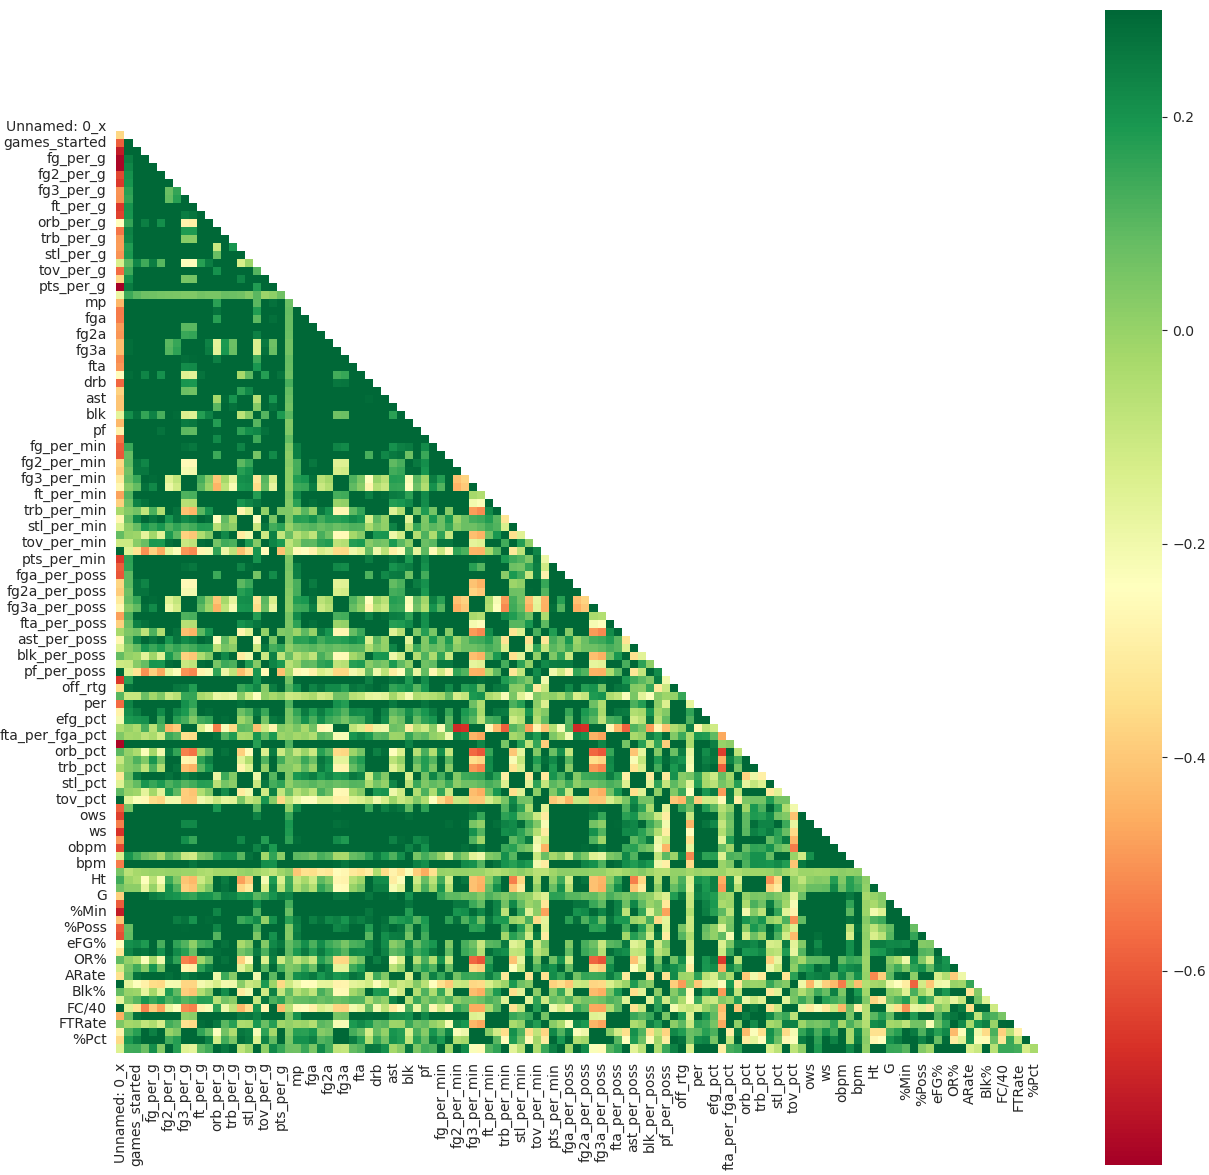

In [117]:
#correlations of each features
corr_matrix = df_to_use.corr()

#plot heat map
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr_matrix, mask=mask, vmax=.3, square=True,cmap="RdYlGn")

In [113]:
df_to_use = fd[columns_to_use]
df_to_use.head(2)

,Unnamed: 0_x,games,games_started,mp_per_g,fg_per_g,fga_per_g,fg2_per_g,fg2a_per_g,fg3_per_g,fg3a_per_g,ft_per_g,fta_per_g,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,sos,mp,fg,fga,fg2,fg2a,fg3,fg3a,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,fg_per_min,fga_per_min,fg2_per_min,fg2a_per_min,fg3_per_min,fg3a_per_min,ft_per_min,fta_per_min,trb_per_min,ast_per_min,stl_per_min,blk_per_min,tov_per_min,pf_per_min,pts_per_min,fg_per_poss,fga_per_poss,fg2_per_poss,fg2a_per_poss,fg3_per_poss,fg3a_per_poss,ft_per_poss,fta_per_poss,trb_per_poss,ast_per_poss,stl_per_poss,blk_per_poss,tov_per_poss,pf_per_poss,pts_per_poss,off_rtg,def_rtg,per,ts_pct,efg_pct,fg3a_per_fga_pct,fta_per_fga_pct,pprod,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,ows,dws,ws,ws_per_40,obpm,dbpm,bpm,year,Ht,Wt,G,S,%Min,ORtg,%Poss,%Shots,eFG%,TS%,OR%,DR%,ARate,TORate,Blk%,Stl%,FC/40,FD/40,FTRate,Pct.2,%Pct,%Pct.1
0,3.0,33,33,36.6,9.2,20.6,5.0,8.8,4.2,11.8,7.5,8.6,0.8,4.3,5.1,2.8,1.5,0.3,2.5,1.9,30.1,-4.39,1208,304.0,679.0,165.0,290.0,139.0,389.0,246.0,283.0,25.0,142.0,167,94.0,49.0,11.0,84.0,63.0,993.0,10.1,22.5,5.5,9.6,4.6,12.9,8.1,9.4,5.5,3.1,1.6,0.4,2.8,2.1,32.9,14.8,33.1,8.0,14.1,6.8,18.9,12.0,13.8,8.1,4.6,2.4,0.5,4.1,3.1,48.3,120.1,104.4,33.0,0.610,0.550,0.573,0.417,888.0,2.4,14.5,8.3,19.3,2.4,1.1,9.4,39.0,6.1,1.4,7.5,0.250,9.3,-1.6,7.7,2019.0,69,180.0,30,30.0,93.9,115.6,37.5,39.4,53.6,59.9,2.5,14.0,19.4,10.8,1.0,2.5,2.2,7.6,42.5,0.346,0.863,0.560
1,8.0,30,29,37.4,8.8,21.9,4.4,10.3,4.4,11.6,4.2,4.9,0.7,2.4,3.1,3.6,0.9,0.0,3.3,2.3,26.1,-0.36,1122,263.0,657.0,131.0,310.0,132.0,347.0,126.0,147.0,22.0,72.0,94,107.0,28.0,0.0,99.0,70.0,784.0,9.4,23.4,4.7,11.1,4.7,12.4,4.5,5.2,3.4,3.8,1.0,0.0,3.5,2.5,28.0,13.3,33.3,6.6,15.7,6.7,17.6,6.4,7.4,4.8,5.4,1.4,0.0,5.0,3.5,39.7,109.0,118.9,22.4,0.539,0.501,0.528,0.224,738.0,2.1,7.5,4.7,24.0,1.4,0.0,12.0,36.4,3.4,-0.2,3.1,0.112,5.8,-3.6,2.2,2019.0,73,170.0,30,30.0,90.4,107.7,34.8,38.8,50.1,53.9,2.1,7.5,24.0,14.5,0.0,1.4,2.5,5.0,22.4,0.380,0.857,0.423


In [53]:
def calculate_ml_scores(df):
    X = df.copy()
    y = X["ows"]

    X.drop('ows', axis=1, inplace=True)

    # Label encoding for categoricals
    for colname in X.select_dtypes("object"):
        X[colname], _ = X[colname].factorize()

    # All discrete features should now have integer dtypes (double-check this before using MI!)
    discrete_features = X.dtypes == int
    
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return X, y, mi_scores

In [59]:
X, y, mi_scores = calculate_ml_scores(df=newdf)

In [66]:
mi_scores1 = mi_scores[:30]

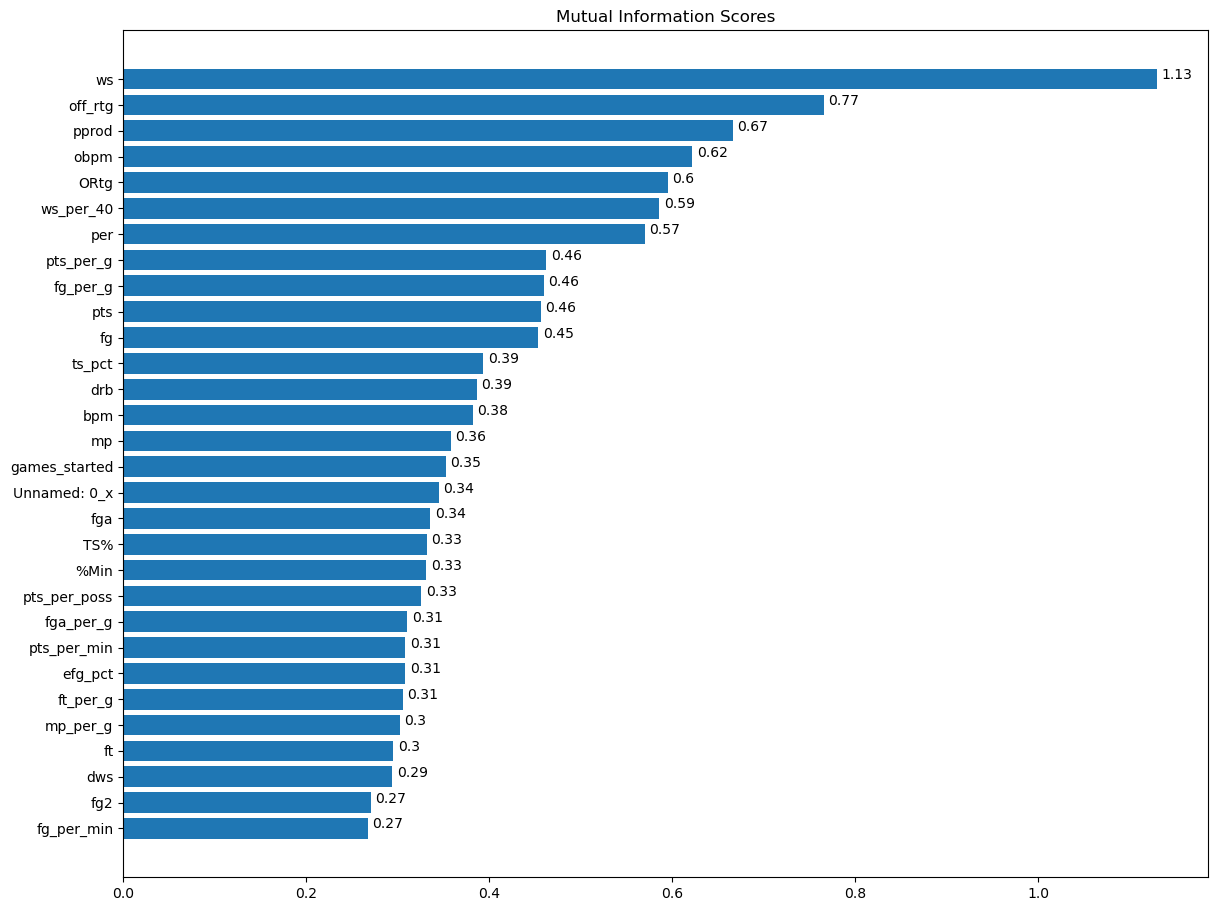

In [67]:
def plot_mi_scores(scores, figsize):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    
    fig, ax = plt.subplots(figsize=figsize)
    ax.barh(width, scores)
    
    for index, value in enumerate(scores):
        plt.text(value +0.005 , index, str(round(value,2)))
    
    plt.yticks(width, ticks)    
    plt.title("Mutual Information Scores")

plot_mi_scores(mi_scores1, figsize=(14,11))

In [ ]:
d = pd.read_csv("D:\\Github\\Capstone-project\\Data folder\\final_data_by_player_type.csv")




In [ ]:
pd.DataFrame